# Maryland Traffic Violation Analysis

## Summer 2024 Data Science Project

Abebaw Tereda, Oscar Javier Soto,  and Geremew Belew


# Introduction

The analysis of traffic violations in Maryland provides critical insights into the patterns and trends of traffic-related incidents within the region. This dataset was sourced from Kaggle. By examining this data, we aim to identify the most common types of traffic violations and their frequencies. We will also analyze the temporal patterns of traffic violations, including peak times and seasonal variations, examine the geographic distribution of traffic violations across different areas, and explore demographic factors, such as race and gender, to understand their influence on traffic violation trends.

The dataset includes detailed information on each traffic violation, such as the date and time of the incident, location, description of the violation, and demographic details of the individuals involved. This helps us analyze the temporal and spatial distribution of traffic violations and examine potential correlations with demographic variables.

Understanding the dynamics of traffic violations is crucial for developing targeted interventions to improve road safety and reduce traffic-related incidents. Insights derived from this analysis can inform policymakers, law enforcement agencies, and community stakeholders, enabling them to implement data-driven strategies to enhance traffic management and public safety.

The analysis will employ various statistical and data visualization techniques to uncover patterns and relationships within the dataset. Tools such as Pandas for data manipulation, Matplotlib for visualization, and machine learning algorithms to predict trends and identify high-risk factors associated with traffic violations. Analyze the temporal patterns of traffic violations, including peak times and seasonal variations.


### Import necessary libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore, chi2_contingency

Load Traffic_Violations.csv dataset into traffic_violations_df dataframe and display the dataframe.

In [2]:
#Display the dataframe after loading the csv file
traffic_violations_df = pd.read_csv("Traffic_Violations.csv")
traffic_violations_df

/tmp/ipykernel_7213/2491360407.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_violations_df = pd.read_csv("Traffic_Violations.csv")


,Date Of Stop,Time Of Stop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,Charge,Article,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type,Geolocation
0,09/24/2013,17:11:00,MCP,"3rd district, Silver Spring",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,...,13-401(h),Transportation Article,No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol,NaN
1,08/29/2017,10:19:00,MCP,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,No,No,...,21-201(a1),Transportation Article,No,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol,"(38.981725, -77.0927566666667)"
2,12/01/2014,12:52:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,...,21-403(b),Transportation Article,No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,"(39.1628883333333, -77.2290883333333)"
3,08/29/2017,09:22:00,MCP,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,No,No,...,21-402(b),Transportation Article,No,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol,"(39.056975, -76.9546333333333)"
4,08/28/2017,23:41:00,MCP,"6th district, Gaithersburg / Montgomery Village",FAILURE OF DR. TO MAKE LANE CHANGE TO AVAIL. L...,355 @ SOUTH WESTLAND DRIVE,NaN,NaN,No,No,...,21-405(e1),Transportation Article,No,WHITE,M,GAITHERSBURG,MD,MD,A - Marked Patrol,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1292394,12/14/2012,23:56:00,MCP,Headquarters and Special Operations,Stop Lights,LOST KNOFE RD/ MVA,39.156846,-77.202903,No,No,...,64*,NaN,No,BLACK,F,MONTGOMERY VILLAGE,MD,MD,A - Marked Patrol,"(39.1568459666667, -77.2029032166667)"
1292395,12/15/2012,00:11:00,MCP,Headquarters and Special Operations,Headlights,MIDCOUNTY HWY/ MILLER FALL DR,39.143137,-77.158675,No,No,...,55*,NaN,No,HISPANIC,M,GAITHERSBURG,MD,MD,A - Marked Patrol,"(39.1431373333333, -77.1586750333333)"
1292396,12/15/2012,00:30:00,MCP,Headquarters and Special Operations,Stop Lights,270/ MVA,39.152770,-77.220292,No,No,...,64*,NaN,No,WHITE,F,GERMANTOWN,MD,MD,A - Marked Patrol,"(39.1527700833333, -77.2202923833333)"
1292397,12/16/2012,22:55:00,MCP,Headquarters and Special Operations,Tag Lights,MD 97/ ASPEN HILL RD,39.080061,-77.074347,No,No,...,65*,NaN,No,BLACK,F,SILVER SPRING,MD,MD,A - Marked Patrol,"(39.0800610666667, -77.0743472)"


### Initial State of the database

Display column names.

In [3]:
#Display the column list
traffic_violations_df.columns

Index(['Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone', 'State',
       'VehicleType', 'Year', 'Make', 'Model', 'Color', 'Violation Type',
       'Charge', 'Article', 'Contributed To Accident', 'Race', 'Gender',
       'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation'],
      dtype='object')

Display column types.

In [4]:
#Display the datatype the original dataset
traffic_violations_df.dtypes

Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
State                       object
VehicleType                 object
Year                       float64
Make                        object
Model                       object
Color                       object
Violation Type              object
Charge                      object
Article                     object
Contributed To Accident     object
Race                

Display the number of rows and columns.

In [5]:
#Display the number of rows and columns
number_of_rows, number_of_columns = traffic_violations_df.shape
print("Number of rows: ", number_of_rows)
print("Number of columns: ", number_of_columns)

Number of rows:  1292399
Number of columns:  35


Check if there is any missing value.

In [6]:
#Use a count function to identify which row has a missing value
traffic_violations_df.count()

Date Of Stop               1292399
Time Of Stop               1292399
Agency                     1292399
SubAgency                  1292389
Description                1292390
Location                   1292397
Latitude                   1197045
Longitude                  1197045
Accident                   1292399
Belts                      1292399
Personal Injury            1292399
Property Damage            1292399
Fatal                      1292399
Commercial License         1292399
HAZMAT                     1292399
Commercial Vehicle         1292399
Alcohol                    1292399
Work Zone                  1292399
State                      1292340
VehicleType                1292399
Year                       1284325
Make                       1292342
Model                      1292212
Color                      1276272
Violation Type             1292399
Charge                     1292399
Article                    1227230
Contributed To Accident    1292399
Race                

As we can see, some of the columns have less number of rows counts, which indicates there are missing values.

Count the number of duplicate rows so that we can remove the duplicates.

In [7]:
duplicate_rows = traffic_violations_df.duplicated()
print("Duplicate entries: ", traffic_violations_df[duplicate_rows].shape[0])

Duplicate entries:  1588


In [8]:
# Check which columns have a missing vlaue
missing_values_count = traffic_violations_df.isnull().sum()
missing_values_count

Date Of Stop                   0
Time Of Stop                   0
Agency                         0
SubAgency                     10
Description                    9
Location                       2
Latitude                   95354
Longitude                  95354
Accident                       0
Belts                          0
Personal Injury                0
Property Damage                0
Fatal                          0
Commercial License             0
HAZMAT                         0
Commercial Vehicle             0
Alcohol                        0
Work Zone                      0
State                         59
VehicleType                    0
Year                        8074
Make                          57
Model                        187
Color                      16127
Violation Type                 0
Charge                         0
Article                    65169
Contributed To Accident        0
Race                           0
Gender                         0
Driver Cit

## Now Clean the Dataset

### Remove the duplicate rows

In [9]:
traffic_violations_df = traffic_violations_df.drop_duplicates()

### Remove the missing value

In [10]:
traffic_violations_df = traffic_violations_df.dropna()

### Now, convert the 'Date Of Stop' column to datetime format.

In [11]:
# Convert the data type of date to datetime type
traffic_violations_df['Date Of Stop'] = pd.to_datetime(traffic_violations_df['Date Of Stop'], format='%m/%d/%Y', dayfirst=True)

In [12]:
# change the data type of time to datetime
traffic_violations_df['Time Of Stop'] = pd.to_datetime(traffic_violations_df['Time Of Stop'], format="%H:%M:%S").dt.time

In [13]:
traffic_violations_df['Year'] = traffic_violations_df['Year'].astype('int32')

### Drop duplicate feature "column" Geolocation as it is already in columns Latitude Longitude

In [14]:
traffic_violations_df.drop(['Geolocation', 'Agency', 'Article', 'Color','Accident'], axis='columns', inplace=True)

### Change the value 'Yes' into 1 and 'No' into 0 for some features

In [15]:
traffic_violations_df['Belts'] = traffic_violations_df['Belts'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Personal Injury'] = traffic_violations_df['Personal Injury'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Property Damage'] = traffic_violations_df['Property Damage'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Commercial License'] = traffic_violations_df['Commercial License'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Commercial Vehicle'] = traffic_violations_df['Commercial Vehicle'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Alcohol'] = traffic_violations_df['Alcohol'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Work Zone'] = traffic_violations_df['Work Zone'].map({'Yes': 1, 'No': 0})
traffic_violations_df['HAZMAT'] = traffic_violations_df['HAZMAT'].map({'Yes': 1, 'No': 0})
traffic_violations_df['Contributed To Accident'] = traffic_violations_df['Contributed To Accident'].map({'Yes': 1, 'No': 0})

In [16]:
gender_count = traffic_violations_df['Gender'].value_counts()
gender_count

M    746578
F    371175
U      1263
Name: Gender, dtype: int64

Since there are so few undefined genders, we decided to remove these values

In [17]:
traffic_violations_df = traffic_violations_df[traffic_violations_df['Gender'] != 'U']

### Now Check the cleaned dataframe

In [18]:
traffic_violations_df

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,...,Model,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
1,2017-08-29,10:19:00,"2nd district, Bethesda",DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC...,WISCONSIN AVE@ ELM ST,38.981725,-77.092757,0,0,0,...,COROLLA,Citation,21-201(a1),0,WHITE,F,FAIRFAX STATION,VA,VA,A - Marked Patrol
2,2014-12-01,12:52:00,"6th district, Gaithersburg / Montgomery Village",FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,0,0,1,...,ACCORD,Citation,21-403(b),0,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol
3,2017-08-29,09:22:00,"3rd district, Silver Spring",FAILURE YIELD RIGHT OF WAY ON U TURN,CHERRY HILL RD./CALVERTON BLVD.,39.056975,-76.954633,0,0,1,...,DAKOTA,Citation,21-402(b),0,BLACK,M,FORT WASHINGTON,MD,MD,A - Marked Patrol
6,2013-10-08,13:23:00,"4th district, Wheaton",DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,GEORGIA AVE / BEL PRE RD,39.093383,-77.079552,0,0,0,...,PICKUP,Citation,13-401(h),0,HISPANIC,M,BELTSVILLE,MD,MD,A - Marked Patrol
10,2014-02-14,20:10:00,"1st district, Rockville",FAILURE TO DRIVE ON RIGHT HAND ROADWAY OF DIVI...,GATEWAY CENTER DR @ CLARKSBURG RD,39.234843,-77.281540,0,0,0,...,STS,Citation,21-311(1),0,WHITE,M,POINT OF ROCK,MD,WV,A - Marked Patrol
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291736,2012-11-12,09:40:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147593,-77.234835,0,0,0,...,SABLE,Warning,21-801.1,0,BLACK,F,GERMANTOWN,MD,MD,A - Marked Patrol
1291737,2012-11-12,09:51:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH,CLOPPER ROAD AT ORCHARD RIDGE DRIVE,39.147572,-77.234841,0,0,0,...,ECLIPSE,Warning,21-801.1,0,WHITE,M,GERMANTOWN,MD,MD,Q - Marked Laser
1291738,2012-11-12,10:21:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.162809,-77.225643,0,0,0,...,CIICIC,Warning,21-801.1,0,ASIAN,F,FREDERICK,MD,MD,Q - Marked Laser
1291739,2012-11-12,10:34:00,"6th district, Gaithersburg / Montgomery Village",EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH,FREDERICK AVE AT PROFESSIONAL DR,39.161533,-77.223629,0,0,0,...,COOPER,Warning,21-801.1,0,WHITE,M,DAMASCUS,MD,MD,Q - Marked Laser


# Part 2 Basic data exploration and summary statistics
- You must present three conclusions using at least three different statistical methods including hypothesis testing.
    - For example: What are the main characteristics of your dataset? How many features and entries are there? Is a feature over-represented? Are features correlated? Are there outliers? Identify the attributes that will affect your choice of primary analysis technique. Etcetera.
-  For each method, you must have at least one gorgeous plot.

## Descriptive Analysis

### Zscore and Outliers, Mode, Mean, Max, Min, Standard deviation

### Zscore and Outliers, Mode, Mean, Max, Min, Standard deviation

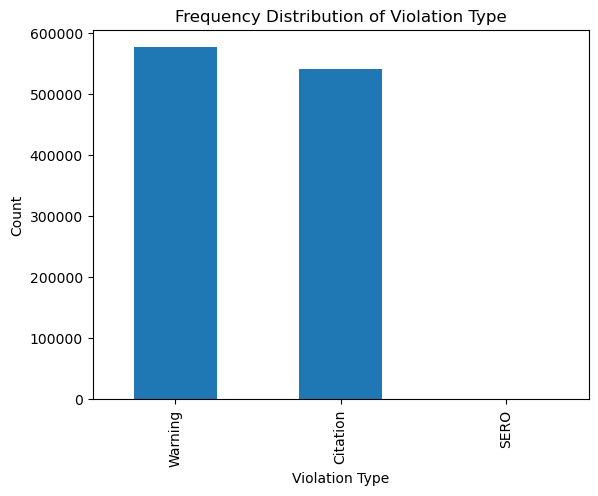

Outliers in 'Violation Type':
SERO    23
Name: Violation Type, dtype: int64


In [19]:
violation_type_counts = traffic_violations_df['Violation Type'].value_counts()

# Bar plot visualization
violation_type_counts.plot(kind='bar')
plt.title('Frequency Distribution of Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.show()

# Calculate z-scores
violation_type_zscores = zscore(violation_type_counts)
violation_type_outliers = violation_type_counts[abs(violation_type_zscores) > 1]
print(f"Outliers in 'Violation Type':\n{violation_type_outliers}")

#### Removing SERO from the Violation Type
We realized that SERO ("Repair Order"), since there are only 23 instances compared to Warning and Citation that have 100,000s of entries. 
Which is why it was marked as an outlier as seen above.

In [20]:
traffic_violations_df = traffic_violations_df[traffic_violations_df['Violation Type'] != 'SERO']

In [21]:
mode_value = traffic_violations_df['Violation Type'].mode()
print("Mode Violation Types: ",mode_value[0])

Mode Violation Types:  Warning


As we can see the mode function, police officers give more warnings then citations, however as we can see from the bar chart, that in actuality they give warnings and citations about evenly

In [22]:
violation_by_SubAgency = traffic_violations_df['SubAgency'].value_counts()
violation_by_SubAgency_info = violation_by_SubAgency.describe()
IQR =  violation_by_SubAgency_info['75%'] -  violation_by_SubAgency_info['25%']
low_lim = violation_by_SubAgency_info['25%'] - 1.5 * IQR
up_lim = violation_by_SubAgency_info['75%']  + 1.5 * IQR

print(violation_by_SubAgency_info)
print("\nUpper Limit  ", up_lim)
print("Lower Limit  ", low_lim)

count         7.000000
mean     159675.714286
std       79760.811099
min       33396.000000
25%      128758.000000
50%      147204.000000
75%      197057.000000
max      285500.000000
Name: SubAgency, dtype: float64

Upper Limit   299505.5
Lower Limit   26309.5


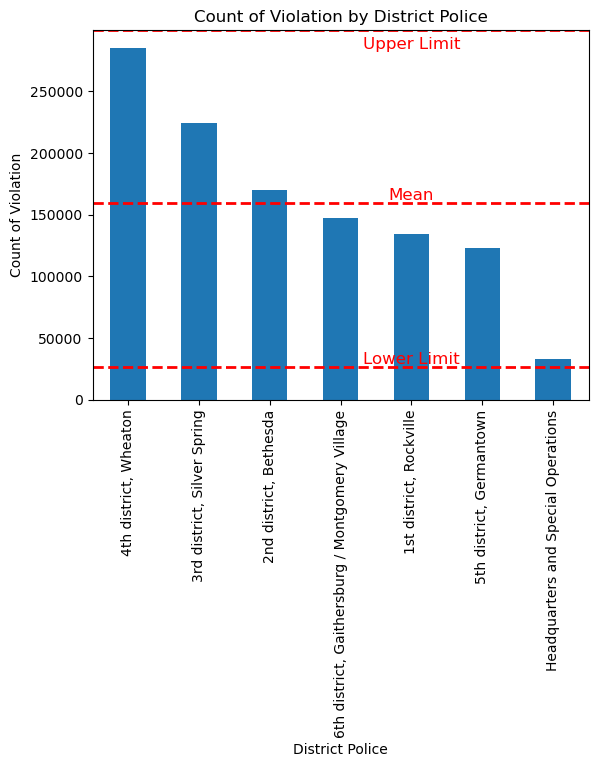

In [23]:
mean = violation_by_SubAgency_info['mean']

# Plot Bar
violation_by_SubAgency.plot(kind='bar')
plt.xlabel('District Police')
plt.ylabel('Count of Violation')
plt.title('Count of Violation by District Police')

# Add a horizontal line
plt.axhline(y=mean, color='r', linestyle='--', linewidth=2)
plt.text(x=4, y=mean + 2500, s='Mean', color='r', ha='center', fontsize = 12)

plt.axhline(y=low_lim, color='r', linestyle='--', linewidth=2)
plt.text(x=4, y=low_lim + 2500, s='Lower Limit', color='r', ha='center', fontsize = 12)

plt.axhline(y=up_lim, color='r', linestyle='--', linewidth=2)
plt.text(x=4, y=up_lim - 15000, s='Upper Limit', color='r', ha='center', fontsize = 12)

plt.show()

At first glance it would look like Headquaters and 4h district could be outliers, however after calculating the IQR, and overlaping the lower and uppper limits on the bar graph, it was clear to see that they were not outliers, since they are within the range.

### Feature Representation

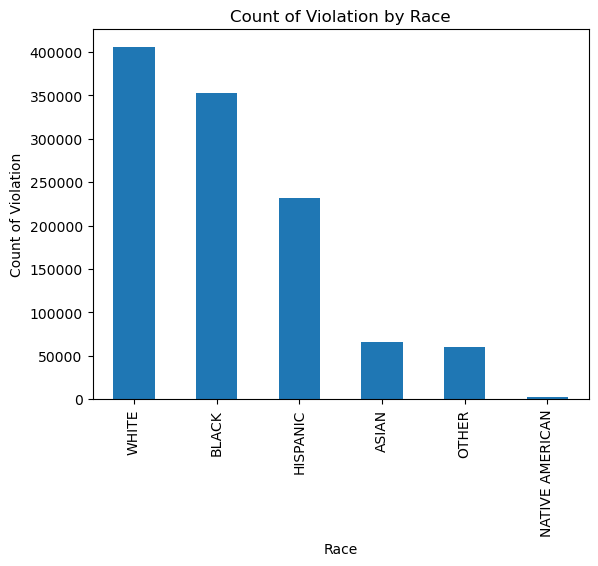

In [24]:
violation_by_race= traffic_violations_df['Race'].value_counts()
violation_by_race.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count of Violation')
plt.title('Count of Violation by Race')
plt.show()

Looking at this bar graph, Asian and Native Americans are under represented in our data set, in comparison to White, Black, and Hispanic people.


However, when we look at  population demographic for Maryland: [Maryland Population 2024 ](https://worldpopulationreview.com/states/maryland-population)
- White: 52.67%
- Black or African American: 29.83%
- Asian: 6.46%
- Two or more races: 5.4%
- Other race: 5.32%
- Native American: 0.28%
- Native Hawaiian or Pacific Islander: 0.05%

The reason Asians and Native Americans have less violations, is because their population is smaller in Maryland. Therefore, they will have less counts of violtation in comparison.


<Figure size 1000x600 with 0 Axes>

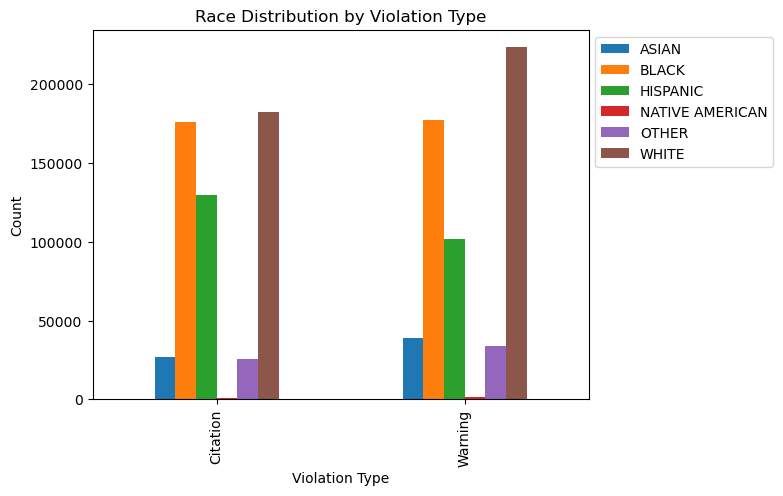

In [25]:
race_by_violationType = pd.crosstab(traffic_violations_df['Violation Type'], traffic_violations_df['Race'])
plt.figure(figsize=(10, 6))
race_by_violationType.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Race Distribution by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.show()

Upon first inspection of the graph, we noticed that Asian, Hispanics, Other, and Native Americans, have approximate the same number of citations to warnings. However, Hispanics have more citations then warnings, which goes against, the first graph "Frequency Distribution of Violation Type Bar Chart" where there are more warnings overall than citations. Futhermore there are way more warnings given to white then citations.

This leads us to think that there is potentially correlations between race and violation types.

## Hypothesis Tests

- $H_{0}$: The gender does not have an effect on the likelihood of receiving a citation

- $H_{A}$: The gender does have an effect on the likelihood of receiving a citation

Our plan is to apply Chi-Squared Test. 

In [26]:
contingency_table = pd.crosstab(traffic_violations_df['Gender'], traffic_violations_df['Violation Type'])
contingency_table

Violation Type,Citation,Warning
Gender,,
F,160280,210892
M,381129,365429


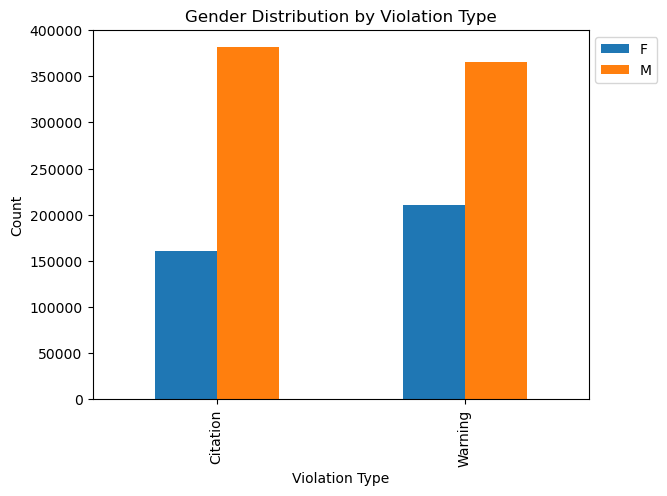

In [27]:
violationtype_by_gender = pd.crosstab(traffic_violations_df['Violation Type'], traffic_violations_df['Gender'])
violationtype_by_gender.plot(kind='bar')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Gender Distribution by Violation Type')
plt.xlabel('Violation Type')
plt.ylabel('Count')
plt.show()

Based on the above graph, Males have the most traffic violations in both categories (citations and warnings). Females have a least number of traffic violations in both categories.

In [28]:
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"P-Value: {p:.10f}")

P-Value: 0.0000000000


Since the p-value is much less than the significance level of 0.05, we reject the null hypothesis. The p-value indicates that there is significant evidence to suggest that gender does have an effect on the likelihood of receiving a citation

In [39]:
charge_counts = traffic_violations_df.groupby('Charge').count()
charge_counts

,Date Of Stop,Time Of Stop,SubAgency,Description,Location,Latitude,Longitude,Belts,Personal Injury,Property Damage,...,Make,Model,Violation Type,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
Charge,,,,,,,,,,,,,,,,,,,,,
11-107.62(0b),10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
11-1527.0(8a),2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11-172.20(0a),2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
11-172.20(2a),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
11-172.30(0),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7-705(b8),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7-705(f1),2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8-409(e),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
